In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline   #to display the images below the cell itself
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)  #the matplotlib images should be 20 units width & 10 units height

In [2]:
df1= pd.read_csv("Bengaluru_House_Data.csv")
df1.head()   #shows the first 5 rows, u can give the desired number as the argument

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')
# first, you group by the area_type and then, on the area_type column, u do the count aggregation 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df1.groupby('area_type')['bath'].agg('count')

area_type
Built-up  Area          2410
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8741
Name: bath, dtype: int64

In [6]:
df2= df1.drop(['society', 'availability','balcony', 'area_type'],axis= 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#Data Cleaning begins
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
#since we have 13320 rows, drooping 73 rows wont be an issue, u can replace with median if u want
df3= df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
'''
df.dropna(subset=['column_name'], inplace=True)
subset=['column_name']: This specifies the subset of columns where NaN values should be considered for removal.
inplace=True: This modifies the DataFrame in place, so you don't need to assign it back to a variable.
'''

"\ndf.dropna(subset=['column_name'], inplace=True)\nsubset=['column_name']: This specifies the subset of columns where NaN values should be considered for removal.\ninplace=True: This modifies the DataFrame in place, so you don't need to assign it back to a variable.\n"

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk']= df3['size'].apply( lambda x: int(x.split(' ')[0]))

C:\Users\chauh\AppData\Local\Temp\ipykernel_18332\578349340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply( lambda x: int(x.split(' ')[0]))


In [15]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return ((float(tokens[0])+ float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None
    

In [25]:
df4= df3.copy()

In [26]:
df4['total_sqft']= df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [27]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [28]:
# FEATURE ENGINEERING
df5= df4.copy()
df5['price_per_sqft']= df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df5.location= df5.location.apply(lambda x:x.strip())
location_stats= df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [30]:
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<10])

1039

In [32]:
location_stats_less_than_ten= location_stats[location_stats<10]

In [33]:
location_stats_less_than_ten

location
2nd Phase JP Nagar       9
Volagerekallahalli       9
Yemlur                   9
4th Block Koramangala    9
Lingarajapuram           9
                        ..
1 Giri Nagar             1
Kanakapura Road,         1
Kanakapura main  Road    1
Karnataka Shabarimala    1
whitefiled               1
Name: location, Length: 1039, dtype: int64

In [34]:
df5.location= df5.location.apply(lambda x:'other' if x in location_stats_less_than_ten else x)
len(df5.location.unique())

255

In [35]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [36]:
# OUTLIER DETECTION & REMOVAL 
df5[df5.total_sqft/df5.bhk < 300 ].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [78]:
df6= df5[~(df5.total_sqft/df5.bhk < 300 )]
df6.shape

(12502, 7)

In [79]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [80]:
def remove_pps_outliers(df):
    df_out= pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m= np.mean(df.price_per_sqft)
        st= np.std(df.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft> (m-st)) & ( subdf.price_per_sqft <= (m+st))]
        df_out= pd.concat([df_out, reduced_df], ignore_index= True)
    return df_out

In [81]:
df6.groupby('location')

In [82]:
print(df6.groupby('location'))

In [83]:
df7= remove_pps_outliers(df6)
df7.shape

(11294, 7)

In [84]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2 BHK,1000.0,3.0,60.00,2,6000.000000
1,1st Block Jayanagar,3 BHK,1760.0,3.0,115.00,3,6534.090909
2,1st Block Koramangala,2 BHK,1415.0,2.0,110.00,2,7773.851590
3,1st Block Koramangala,2 BHK,860.0,2.0,65.50,2,7616.279070
4,1st Block Koramangala,4 BHK,3000.0,3.0,300.00,4,10000.000000
...,...,...,...,...,...,...,...
11289,other,2 BHK,1256.0,2.0,65.00,2,5175.159236
11290,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
11291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
11292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333


62 69


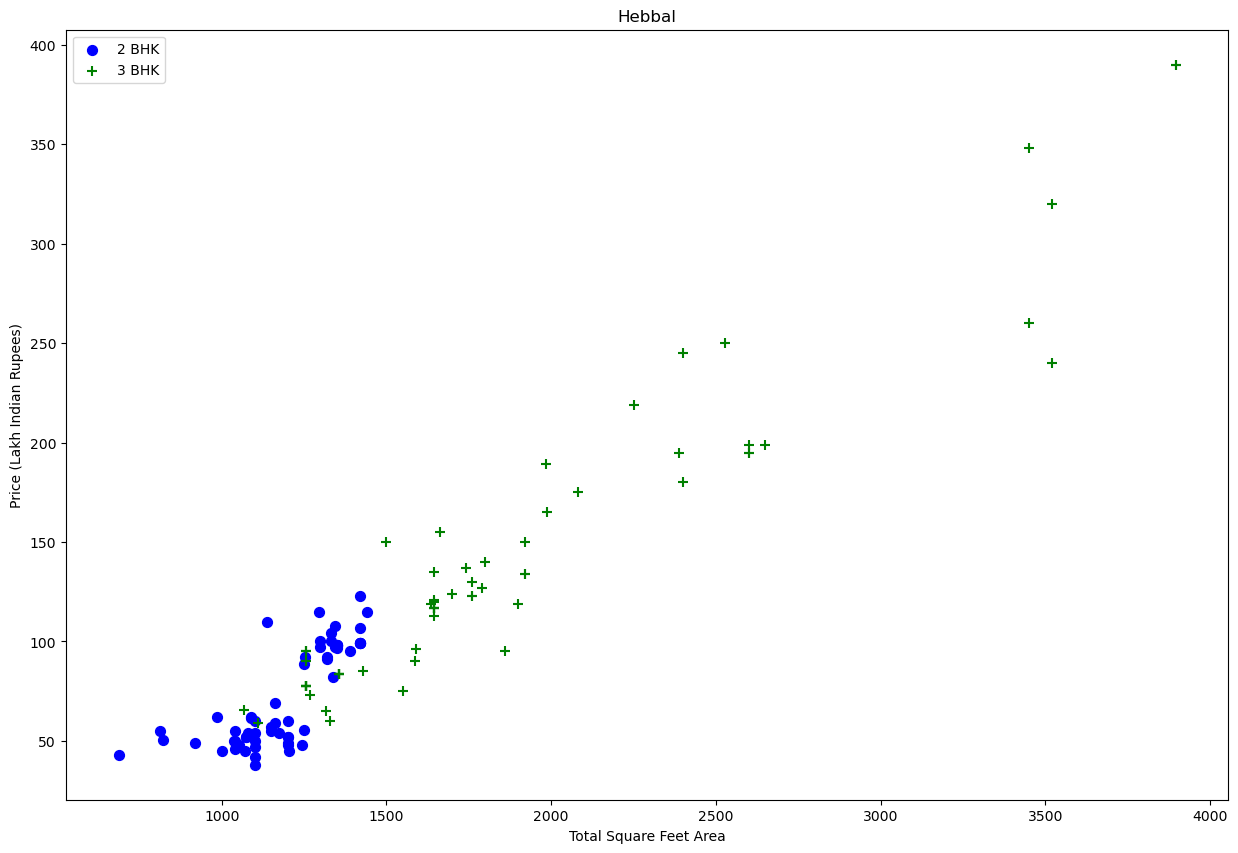

In [86]:
def plot_scatter_chart(df, location):
    bhk2= df[(df.location==location)& (df.bhk==2)]
    bhk3= df[(df.location==location)& (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']= (15,10)
    print(len(bhk2), len(bhk3))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, 'Hebbal')

In [89]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats= {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]= {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats= bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft< (stats['mean'])].index.values )
    return df.drop(exclude_indices, axis= 'index')
df8= remove_bhk_outliers(df7)
df8.shape

(8135, 7)

62 61


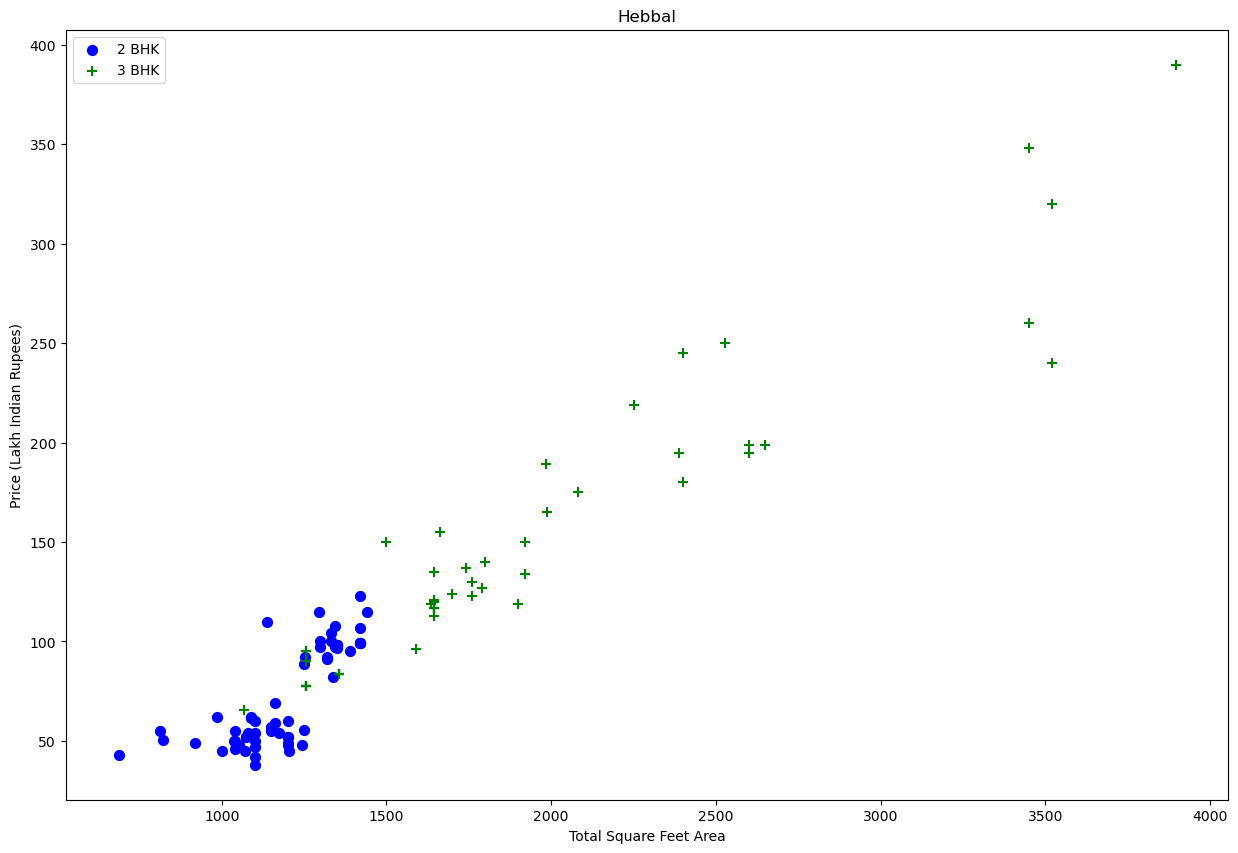

In [91]:
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count')

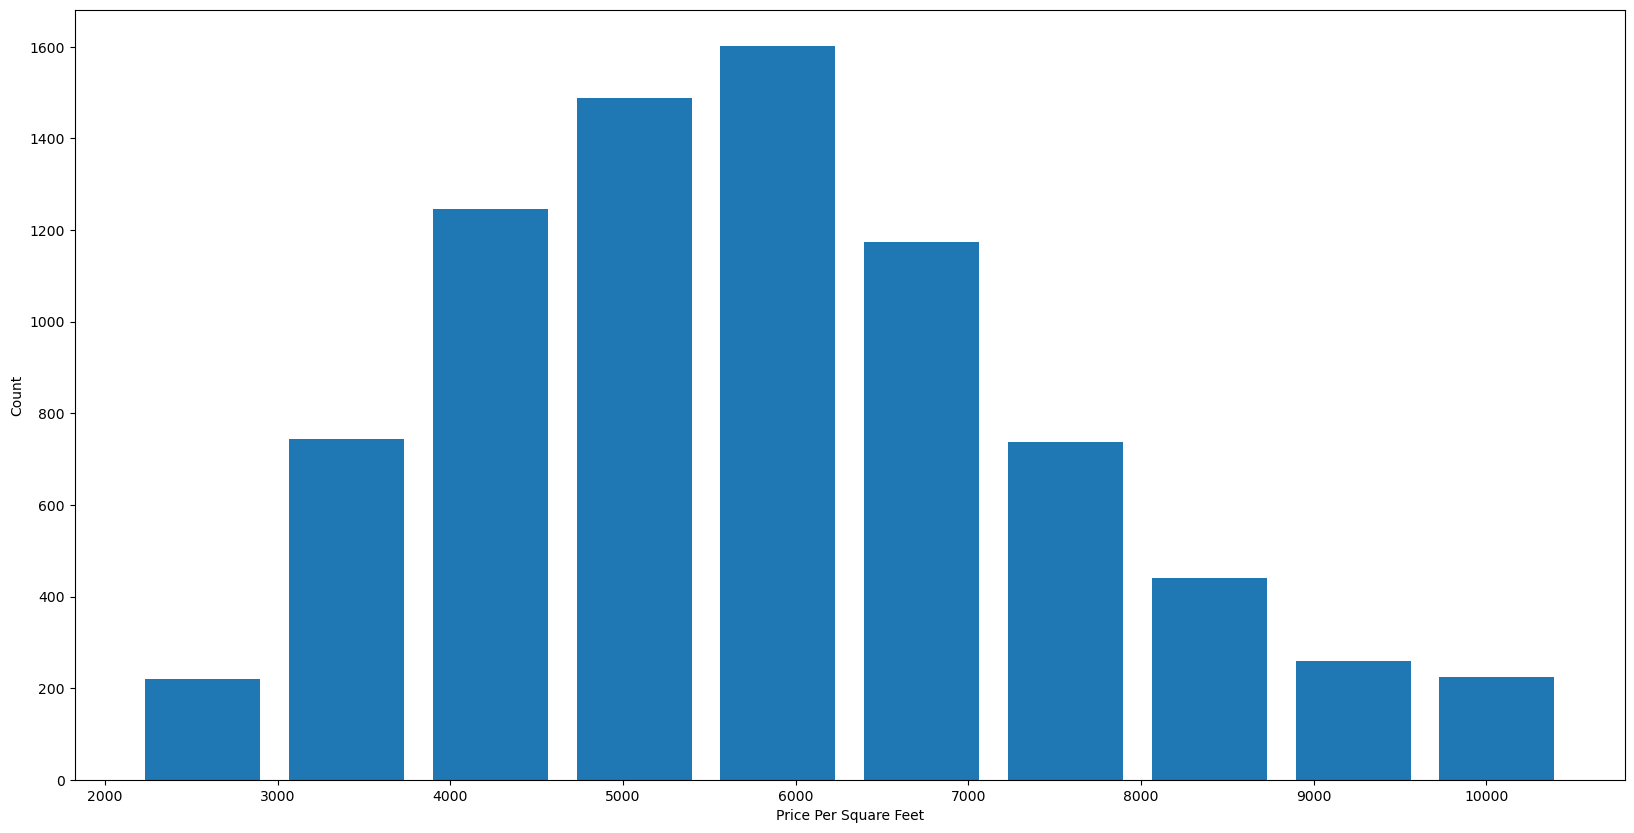

In [92]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [93]:
df8.bath.unique

<bound method Series.unique of 0        3.0
1        3.0
2        2.0
3        2.0
4        3.0
        ... 
11287    2.0
11288    2.0
11289    2.0
11290    2.0
11291    1.0
Name: bath, Length: 8135, dtype: float64>

In [94]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6201,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9768,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9842,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10478,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10766,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

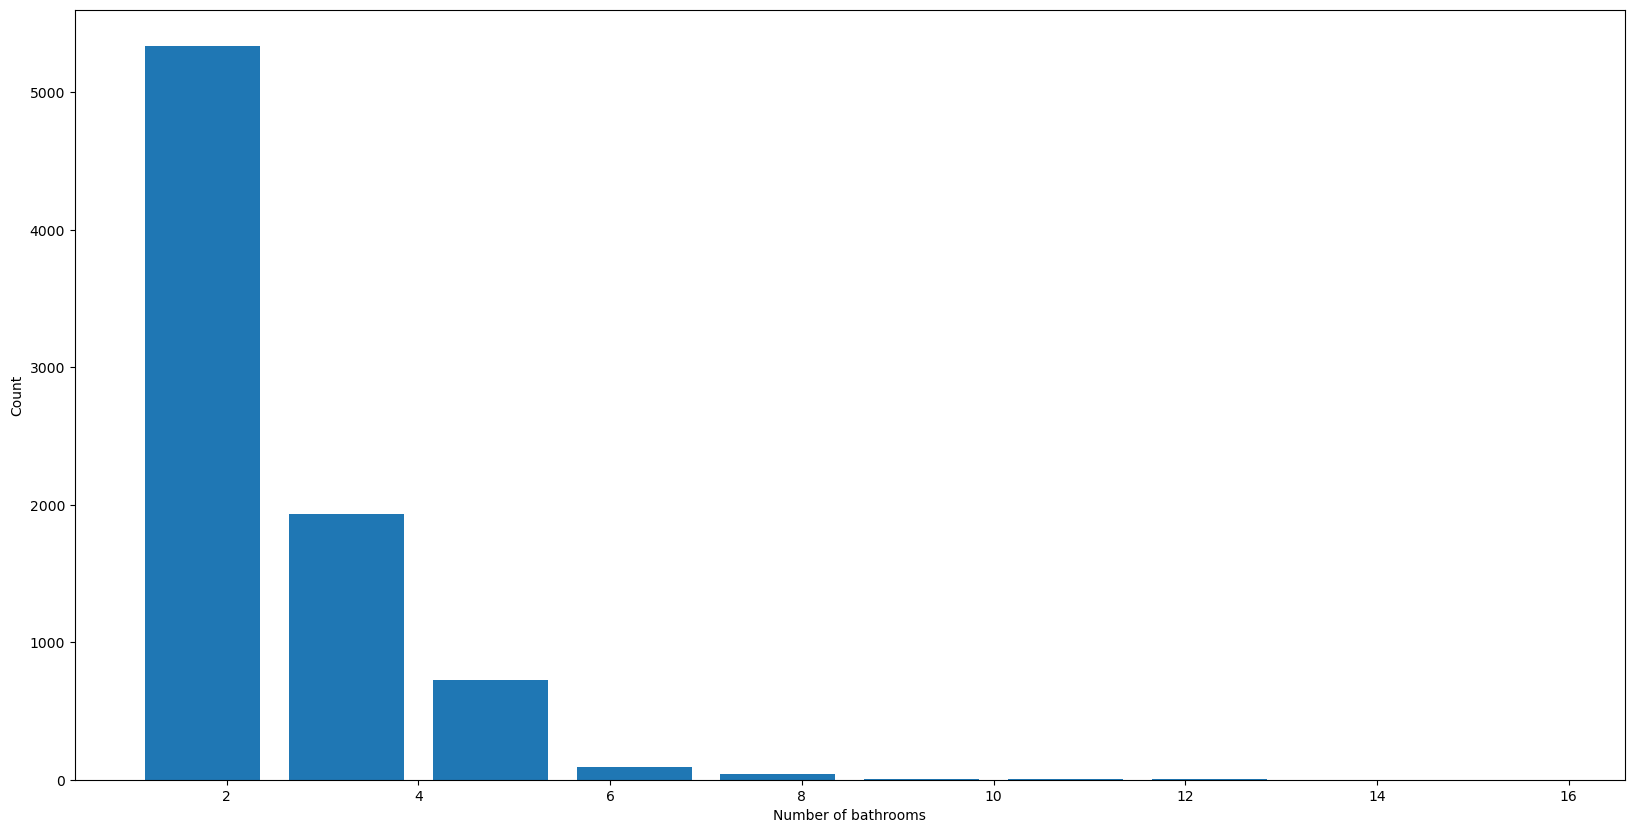

In [95]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [96]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(8055, 7)

In [97]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1000.0,3.0,60.0,2
1,1st Block Jayanagar,1760.0,3.0,115.0,3
2,1st Block Koramangala,1415.0,2.0,110.0,2


In [98]:
import pickle

In [99]:
import json

In [100]:
dummies= pd.get_dummies(df10.location)

In [101]:
dummies.head(10)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
df11= pd.concat([df10, dummies.drop('other', axis='columns')], axis= 'columns')
df11.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1000.0,3.0,60.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1760.0,3.0,115.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Koramangala,1415.0,2.0,110.0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Koramangala,860.0,2.0,65.5,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Koramangala,3000.0,3.0,300.0,4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Block Koramangala,2350.0,3.0,210.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Block Koramangala,1800.0,3.0,53.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1st Block Koramangala,1000.0,2.0,45.0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,1875.0,3.0,167.0,3,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1st Phase JP Nagar,1500.0,5.0,85.0,5,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [103]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,60.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1760.0,3.0,115.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [104]:
df12.shape

(8055, 256)

In [105]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1760.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1415.0,2.0,2,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [106]:
X.shape

(8055, 255)

In [107]:
y = df12.price
y.head(3)

0     60.0
1    115.0
2    110.0
Name: price, dtype: float64

In [108]:
y = df12.price
y.head(3)

0     60.0
1    115.0
2    110.0
Name: price, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [110]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9057729810849242

In [113]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([-4.26982818e+15,  9.11733822e-01, -6.19179266e+14,  8.64765599e-01,
       -1.68908298e+15])

In [115]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\User

,model,best_score,best_params
0,lasso,0.836103,"{'alpha': 2, 'selection': 'cyclic'}"
1,decision_tree,0.804343,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [116]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [117]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.99855533192209

In [118]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\chauh\.conda\envs\tf_new\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.89824367136504

In [119]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [120]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))